The code below makes sure that it constantly checks if there were changes in made in the `inverse_optim` package.

In [2]:
%load_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from inverse_optim import gen_data
from inverse_optim import research_plot
from inverse_optim import sancho
import tadasets
import tqdm
import powerbox as pbox

2023-02-08 20:18:16.911093: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Circle & Figure eight

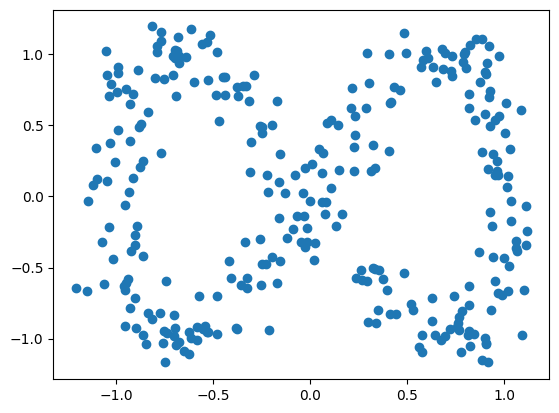

In [14]:
# This is a synthetic data set that we want "approximate"
N=300
# goal_pts = tadasets.dsphere(n=N, d=1, noise=0.1) # circle
goal_pts = tadasets.infty_sign(n=N, noise=0.1) # figure eight

# To perform Stochastic Gradient Descent (SGD), we need our set to be of tensor type
goal_pts = torch.tensor(goal_pts)

# Plot the initial/goal data set
P = goal_pts.detach().numpy()
plt.scatter(P[:, 0], P[:, 1])
plt.show()

With the code below, we do not use the sliced wasserstein distance as the loss function.

 16%|█▌        | 93/600 [00:01<00:07, 65.65it/s]

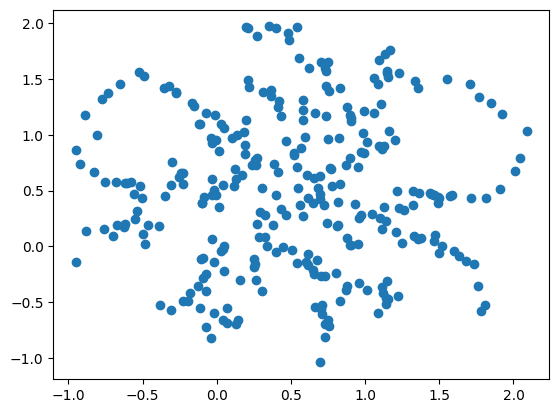

 33%|███▎      | 197/600 [00:03<00:05, 74.79it/s]

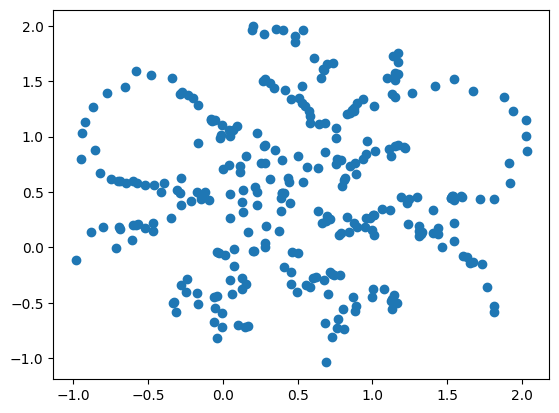

 49%|████▉     | 295/600 [00:04<00:04, 62.10it/s]

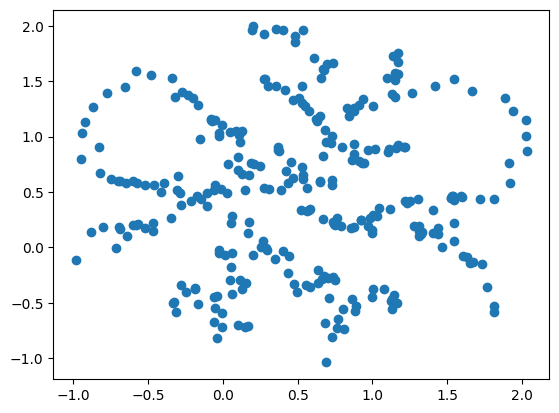

 65%|██████▌   | 391/600 [00:06<00:02, 81.42it/s]

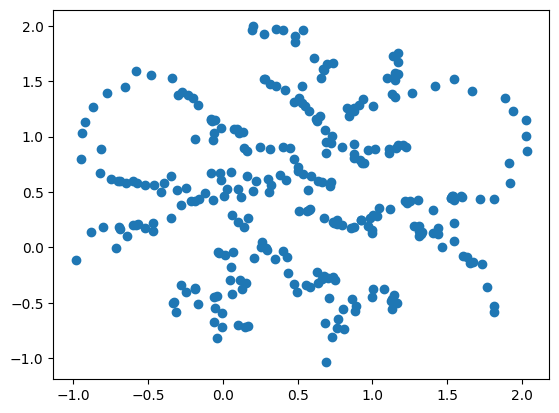

 83%|████████▎ | 497/600 [00:07<00:01, 82.87it/s]

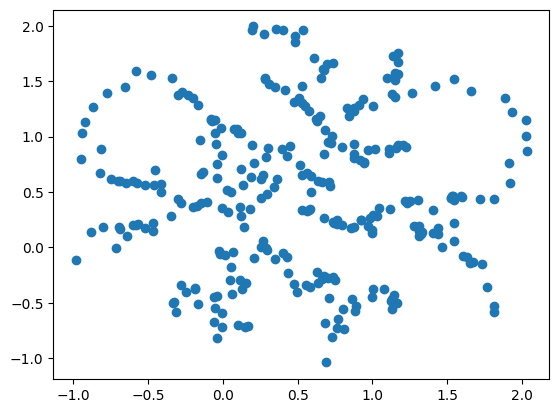

 99%|█████████▉| 595/600 [00:08<00:00, 81.84it/s]

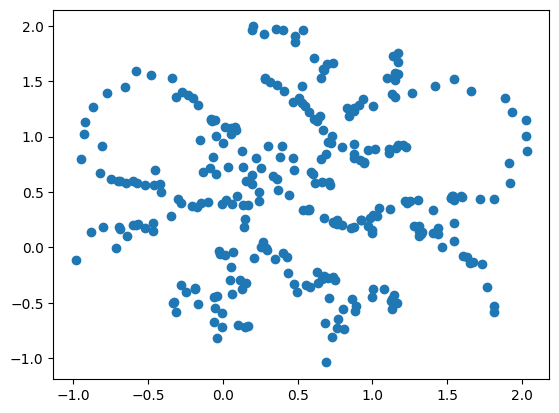

100%|██████████| 600/600 [00:08<00:00, 67.05it/s]


In [22]:
# Creation of the PD that we want to get to
goal_pd = gen_data.create_alpha_pd(goal_pts)

# # Generation of new dataset
final_pts = gen_data.generate_data_alpha(goal_pd=goal_pd, amount=N, dim=2, lr=0.36, epochs=600, decay_speed=30, investigate=False)

# # Research on optimal learning rate
# lr_list = np.linspace(0.1, 0.5, 4)
# research_plot.research_lr(lr_list=lr_list, goal_pd=goal_pd, amount=N, dim=2, epochs=300, decay_speed=30)

# # Research on movement of points
# research_plot.research_move(0.4, goal_pd=goal_pd, amount=N, dim=2, epochs=700, decay_speed=50)


With the code below, we use the sliced wasserstein distance

In [1]:
# Creation of the PD that we want to get to
goal_pd = gen_data.create_alpha_pd(goal_pts)

# Generation of new dataset
final_pts = gen_data.generate_data_alpha(goal_pd=goal_pd, amount=N, dim=2, lr=1.3, epochs=600, decay_speed=50, investigate=False, sliced=True)

# # Research on optimal learning rate
# lr_list = np.linspace(0.5, 1.8, 6)
# research_plot.research_lr(lr_list=lr_list, goal_pd=goal_pd, amount=N, dim=2, epochs=300, decay_speed=10, sliced=True)

# Research on movement of points
# research_plot.research_move(0.4, goal_pd=goal_pd, amount=N, dim=2, epochs=700, decay_speed=50)


NameError: name 'gen_data' is not defined

Compare the power spectra of generated circle and original circle

In [ ]:
goal_pts = goal_pts.detach().numpy()
final_pts = final_pts.detach().numpy()

In [11]:
# The number of grid points are also required when passing the samples
p_k_samples, bins_samples = pbox.get_power(goal_pts, 2.0, N=N)
p_k_samples_new, bins_samples_new = pbox.get_power(final_pts, 8.0, N=N)

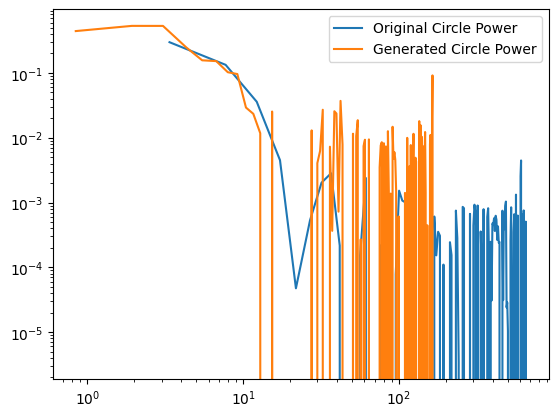

In [12]:
plt.plot(bins_samples, p_k_samples,label="Original Circle Power")
plt.plot(bins_samples_new, p_k_samples_new,label="Generated Circle Power")

plt.legend()
plt.xscale('log')
plt.yscale('log')

## Figure Eight

# Sancho

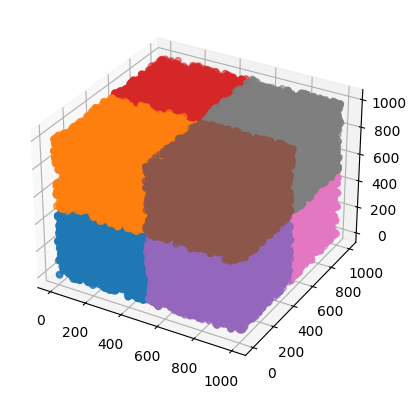

In [57]:
# Load dataset
cat = np.load(f'/Users/sliemela/Downloads/Sancho/fiducial_HOD_fid_NFW_sample0_1Gpc_z0.50_RSD3_run0.npz')
pos = cat['pos']        # shape: (N_galaxies, 3) --> X,Y,Z position of each galaxy in Mpc/h
vel = cat['vel']        # shape: (N_galaxies, 3) --> Vx, Vy, Vz velocity of the galaxy in km/s
gtype = cat['gtype']

# Split up the dataset
split = (2,2,2)
bins = sancho.bin(pos, split)

# Plotting the bins
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for x in bins:
    if len(x) != 0:
        ax.scatter3D(x[:, 0], x[:, 1], x[:, 2])

In [58]:
# Calculating the statistics of the wasserstein distances of sancho
list_of_wasser_dist = sancho.compare_wasser_alpha(bins)

wasser_mean = np.mean(list_of_wasser_dist)
wasser_std = np.std(list_of_wasser_dist)

print(wasser_mean)
print(wasser_std)

# NOTE: the code of compare_wasser_alpha has been changed to only consider the first 3000. In the future, we may consider all pairs. 

  0%|          | 0/28 [00:00<?, ?it/s]

: 

: 

# Experiment

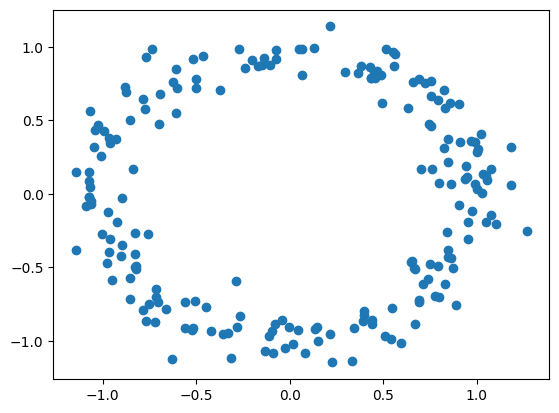

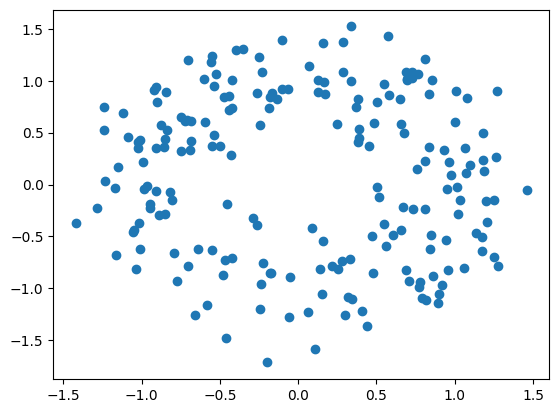

In [12]:
# This is a synthetic data set that we want "approximate"
N=200
pts1 = tadasets.dsphere(n=N, d=1, noise=0.1)

# To perform Stochastic Gradient Descent (SGD), we need our set to be of tensor type
pts1 = torch.tensor(pts1)

# Plot the initial/goal data set
P = pts1.detach().numpy()
plt.scatter(P[:, 0], P[:, 1])
plt.show()

# This is a synthetic data set that we want "approximate"
pts2 = tadasets.dsphere(n=N, d=1, noise=0.3)

# To perform Stochastic Gradient Descent (SGD), we need our set to be of tensor type
pts2 = torch.tensor(pts2)

# Plot the initial/goal data set
P = pts2.detach().numpy()
plt.scatter(P[:, 0], P[:, 1])
plt.show()

In [118]:
# # Define the diagrams
# pd1 = gen_data.create_alpha_pd(pts1)
# pd1 = tf.convert_to_tensor(pd1, dtype=tf.float32)
# pd2 = gen_data.create_alpha_pd(pts2)
# pd2 = tf.convert_to_tensor(pd2, dtype=tf.float32)
# dgms = [pd1, pd2]

pd1 = torch.tensor(np.array([[2,3], [4,5]]), dtype=torch.float32)
pd2 = torch.tensor(np.array([[2,5], [2,4], [3,6]]), dtype=torch.float32)
dgms = [pd1, pd2]


# CODE STARTS
# Make a cumulative sum array that keeps track of the sizes of the amount of feautures per diagram
ccards = np.cumsum([0] + [dgm.shape[0] for dgm in dgms])
thetas = torch.tensor([k/6 * np.pi for k in range(1,5)], dtype=torch.float32)


# pd1 = tf.convert_to_tensor(np.array([[2,3], [4,5]]), dtype=tf.float32)
# pd2 = tf.convert_to_tensor(np.array([[2,5], [2,4], [3,6]]), dtype=tf.float32)
# dgms = [pd1, pd2]


# # CODE STARTS
# # Make a cumulative sum array that keeps track of the sizes of the amount of feautures per diagram
# ccards = np.cumsum([0] + [dgm.shape[0] for dgm in dgms])
# thetas = tf.convert_to_tensor([k/6 * np.pi for k in range(1,5)], dtype=tf.float32)


print("one by one")
for theta in thetas:
    dist = gen_data.sliced_wasserstein_distance(dgms, theta).dtype
    print(dist)




from gudhi.wasserstein import wasserstein_distance

print("Wasserstein")
print(wasserstein_distance(pd1, pd2, order=1, enable_autodiff=True, keep_essential_parts=False).dtype)


one by one
I can start at least
tensor([0.5236])
Lets go
torch.float32
I can start at least
tensor([1.0472])
Lets go
torch.float32
I can start at least
tensor([1.5708])
Lets go
torch.float32
I can start at least
tensor([2.0944])
Lets go
torch.float32
Wasserstein
torch.float32


[autoreload of inverse_optim.gen_data failed: Traceback (most recent call last):
  File "/Users/sliemela/Environments/inverse_optim_env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/sliemela/Environments/inverse_optim_env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/sliemela/opt/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/sliemela/opt/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/sliemela/Google Drive/Education/UvA/Double Master/Thesis/Programming/Inverse Optimization/s

## Periodic boundary conditions experiment

Experiment to fix boundary conditions. Currently failed.

100%|██████████| 100/100 [00:00<00:00, 107.79it/s]


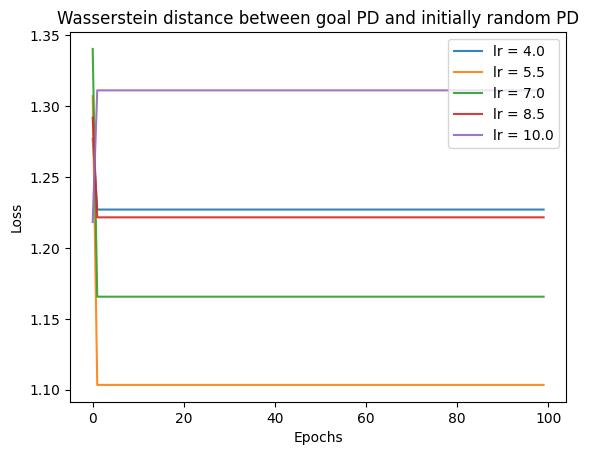

In [39]:
y = tadasets.dsphere(n=100, d=1, noise=0.1)

# Translate whole point set so that nothing is negative
x = np.min(y)
y = y - x

# Create periodic boundaries
z = np.max(y)


# To perform Stochastic Gradient Descent (SGD), we need our set to be of tensor type
y = torch.tensor(y)

# Plot the initial/goal data set
# P = y.detach().numpy()
# plt.scatter(P[:, 0], P[:, 1])
# plt.show()

# Creation of the PD that we want to get to
goal_pd = gen_data.create_alpha_pd(y)

# Generation of new dataset
lr_list = np.linspace(4,10,5)
for lr in lr_list:
    _, loss_list, _, _, _ = \
        gen_data.per_generate_data_alpha(goal_pd=goal_pd, amount=100, dim=2, lr=1.5, epochs=100, per1=z, per2=x, decay_speed=10, investigate=True)
    
    # Loss research
    plt.plot(range(100), loss_list, label=f"lr = {lr}", alpha=0.9)

# Loss research
plt.title("Wasserstein distance between goal PD and initially random PD")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()



# Gaussian random fields and the 2 point correlator

In [44]:
import numpy as np

def generate_gaussian_field(shape, mean, std_dev):
    return np.random.normal(loc=mean, scale=std_dev, size=shape)

def generate_point_set_from_field(field, number_of_points):
    # Generate a set of indices for the points
    indices = np.random.choice(np.arange(field.size), size=number_of_points, replace=True)
    
    # Use the indices to extract the values from the field
    return field.flat[indices]

# Example usage:
field = generate_gaussian_field((5, 5), 0, 1)
print(field.shape)
points = generate_point_set_from_field(field, 25)

print(points)
# plt.scatter(points[:,0], points[:, 1])


(5, 5)
[-0.45987555  0.29013355 -0.27555107 -0.2559436   0.74510307 -0.19310641
 -0.27555107 -0.52434751 -0.2559436   0.29722586  0.48562769 -0.24547657
 -0.7745019  -0.23272301  0.48562769  0.29722586  0.83346726  0.29013355
  0.70465853  0.67860958 -1.18192607 -0.27555107  0.29722586  0.29722586
 -0.53051178]


In [32]:
import numpy as np
import matplotlib.pyplot as plt

mean = [0, 0]
cov = [[1, 0], [-3, 1]]


# Define size (x,y) and grid
size = (10,20)
grid = np.ndindex(size)

# 


import matplotlib.pyplot as plt
field = np.random.multivariate_normal(mean, cov, 1).T
print(field)

[[-1.71810735]
 [ 0.65701821]]


/var/folders/bx/2vdkg8px0_d133yw2cwygr4c0000gn/T/ipykernel_76216/1219582800.py:16: RuntimeWarning: covariance is not positive-semidefinite.
  field = np.random.multivariate_normal(mean, cov, 1).T


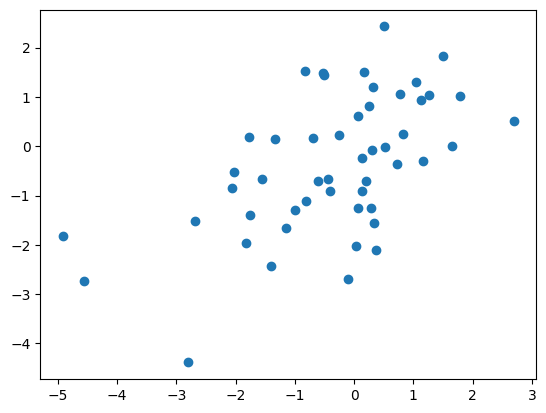

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def generate_2d_realization(shape, length_scale, nugget, random_seed=None):
    if random_seed:
        np.random.seed(random_seed)
    
    # Generate a Gaussian random field with a given shape
    size = np.prod(shape)
    covariance_matrix = np.exp(-0.5 * np.abs(np.subtract.outer(np.arange(size), np.arange(size)))**2 / length_scale**2) + nugget * np.eye(size)
    field = np.random.multivariate_normal(mean=np.zeros(size), cov=covariance_matrix, size=1).reshape(*shape)
    
    return field

# Example usage:
field = generate_2d_realization((50, 50), 100, 1, random_seed=123)

# Plot the 2D realization
plt.scatter(field[:,0], field[:, 1])
plt.show()


In [40]:
size=10
np.abs(np.subtract.outer(np.arange(size), np.arange(size)))

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [1, 0, 1, 2, 3, 4, 5, 6, 7, 8],
       [2, 1, 0, 1, 2, 3, 4, 5, 6, 7],
       [3, 2, 1, 0, 1, 2, 3, 4, 5, 6],
       [4, 3, 2, 1, 0, 1, 2, 3, 4, 5],
       [5, 4, 3, 2, 1, 0, 1, 2, 3, 4],
       [6, 5, 4, 3, 2, 1, 0, 1, 2, 3],
       [7, 6, 5, 4, 3, 2, 1, 0, 1, 2],
       [8, 7, 6, 5, 4, 3, 2, 1, 0, 1],
       [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]])

In [41]:
np.eye(size)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [44]:
%pip install emcee

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 784.0 kB/s eta 0:00:00 0:00:01

[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
rand_amp= np.random.uniform(0, 10,1)[0]
rand_power = np.random.uniform(.75, 1.75, 1)[0]
size_exponent = 7
print(f'amplitude: {rand_amp:.3f}',
      f'power: {rand_power:.3f}',
      f'size: {2 ** size_exponent}',
      sep='\n')
# Create an instance, generate the realization, 
# and compute the autocorrelation functions.
c = CmbPy(size_exponent=size_exponent, amplitude=rand_amp, power=rand_power)
c.generate()
c.compute_auto_corrs()

amplitude: 6.066
power: 1.017
size: 128


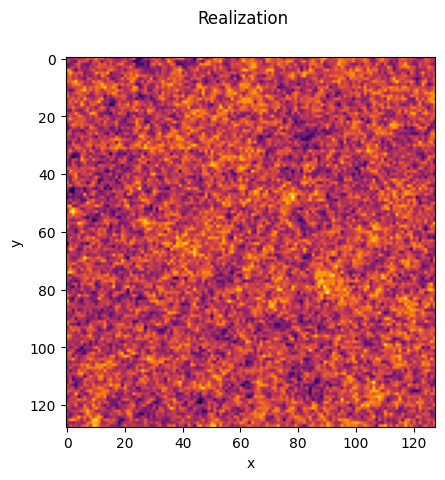

In [50]:
c.show_x_realization()


In [9]:
x = np.array([[1,2,3,4], [3,4, 6, 7]])
y = np.array([[9,0], [2,4]])

z = np.concatenate((x,y), axis=1)
print(z)

[[1 2 3 4 9 0]
 [3 4 6 7 2 4]]
